# Environment

In [1]:
import os
import io
import time
import requests
import zipfile
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Adjust CWD
directory = os.getcwd().replace('\\notebooks', '')
os.chdir(directory)

In [3]:
# Download and store ACPDS
# Alternatively, you can manually download 'data' from README.md and upload 'data' under the 'dataset' folder to circumvent this if statement
if not os.path.exists('dataset/data'): 
    r = requests.get("https://pub-e8bbdcbe8f6243b2a9933704a9b1d8bc.r2.dev/parking%2Frois_gopro.zip")
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall('dataset/data')

# Visualize ACPDS + Annotations

In [4]:
from dataset import acpds
from utils import transforms
from utils import visualize as vis

In [5]:
# create training, validation, and test splits
train_ds, valid_ds, test_ds = acpds.create_datasets('dataset/data')

In [7]:
print(len(train_ds))
print(len(valid_ds))
print(len(test_ds))

231
35
27


## Training, Validation, and Test Splits

In [ ]:
# Set dataset you would like to visualize
split = test_ds

In [ ]:
# Visualize annotated images
for i, (image_batch, rois_batch, labels_batch) in enumerate(split):
    image, rois, labels = image_batch[0], rois_batch[0], labels_batch[0] # select first observation in current bath
    image = transforms.preprocess(image) # resize, normalize, convert to float32, and set resolution to None
    vis.plot_ds_image(image, rois, labels, show=True) # Output prediction annotated image 

## Individual Image

### Annotated

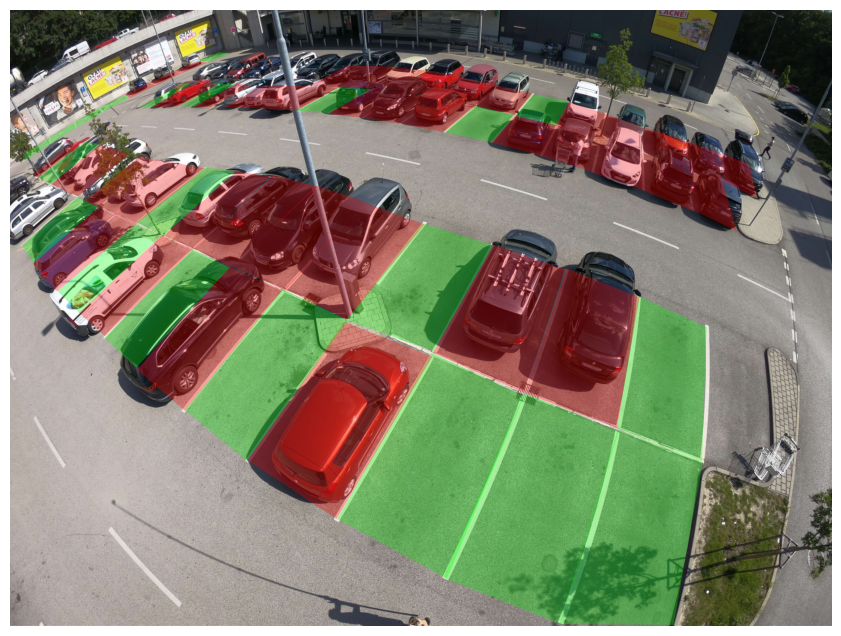

In [ ]:
image_batch, rois_batch, labels_batch = next(iter(valid_ds)) # retrieve next batch of data from validation set
image_raw, rois, labels = image_batch[0], rois_batch[0], labels_batch[0] # select first observation in batch
image = transforms.preprocess(image_raw, res=1440) # resize, normalize, convert to float32, and set resolution to 1440
vis.plot_ds_image(image, rois, labels, show=True) # output annotated image

### Unannotated

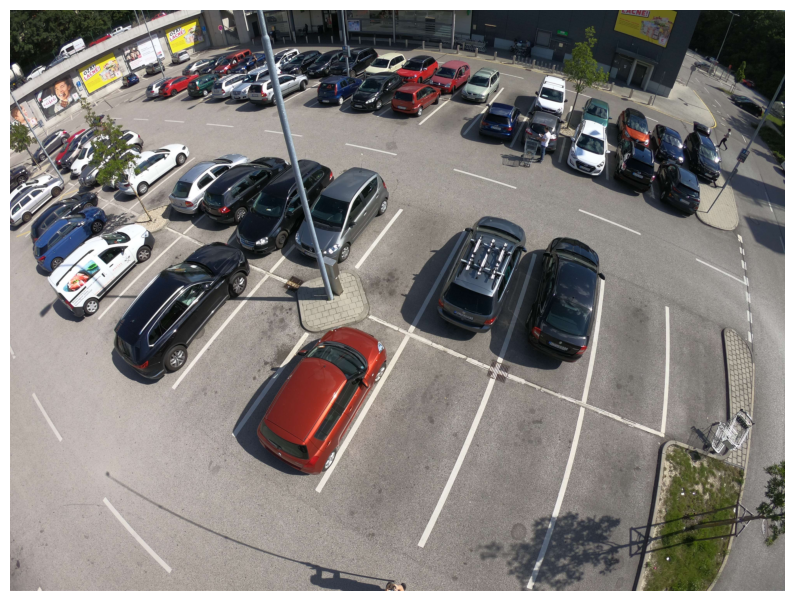

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(vis.image_pt_to_np(image))
plt.axis('off')
plt.show()

# Visualize Square Pooling

In [ ]:
from models.utils import pooling

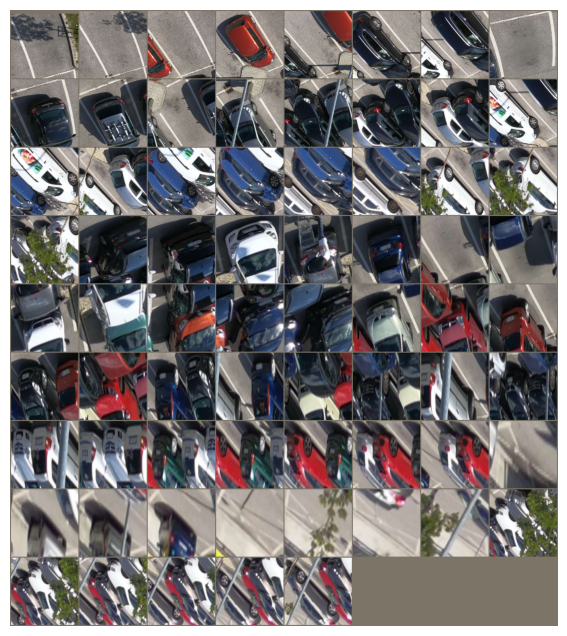

In [ ]:
# Square Pooling
warps = pooling.roi_pool(image, rois, 128, 'square')
vis.show_warps(warps)
# 128 specifies the side length of the square region to be pooled around each ROI. (100 x 100)